In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

In [3]:
from IPython.display import clear_output

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import sys
if '../..' not in sys.path:
    sys.path.insert(0, '../..')
    
from validation_src.val_nas_executor import NASExecutor    

In [5]:
## restrict memory growth -------------------
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
try:
    gpu_0 = physical_devices[0]
    tf.config.experimental.set_memory_growth(gpu_0, True) 
    #tf.config.experimental.set_virtual_device_configuration(gpu_0, [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6500)])
    print(' ==> Restrict GPU memory growth: True')
except: 
    raise Exception("Invalid device or cannot modify virtual devices once initialized.")
## restrict memory growth ------------------- 

 ==> Restrict GPU memory growth: True


--------------------------------------------------------------------------------
Preparing NASExecutor:
  Algorithm: rl
  Dataset: cifar100
  Max Training Hours: 50
  Search Space Indicator: sss
  Use Neptune: False
-----
  kwargs: {'controller_params': {'controller_max_proposed_arch_len': 5, 'controller_classes': 8, 'controller_lstm_dim': 100, 'controller_optimizer': <Optimizer.ADAMAX: 'Adamax'>, 'controller_learning_rate': 0.01, 'controller_decay': 0.1, 'controller_momentum': 0.0, 'controller_use_predictor': False, 'controller_loss_alpha': 0.6, 'controller_training_epochs': 20, 'controller_batch_size': 256}}
-----
[2023-08-30 13:12:43] Try to use the default NATS-Bench (size) path from fast_mode=True and path=None.
  .. Number of layers: 5
  .. Candidates: [8, 16, 24, 32, 40, 48, 56, 64]
Tried 100 models, valid 100, time_spent_in_hours: 2h, time_spent_in_secs: 9782.228s, elapse since last report: 15.825s.
Tried 200 models, valid 200, time_spent_in_hours: 5h, time_spent_in_secs: 19244

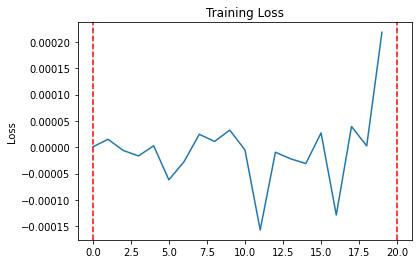

Tried 300 models, valid 300, time_spent_in_hours: 7h, time_spent_in_secs: 28174.157s, elapse since last report: 16.586s.
Tried 400 models, valid 400, time_spent_in_hours: 9h, time_spent_in_secs: 35910.327s, elapse since last report: 15.647s.
Tried 500 models, valid 500, time_spent_in_hours: 12h, time_spent_in_secs: 43750.053s, elapse since last report: 16.292s.


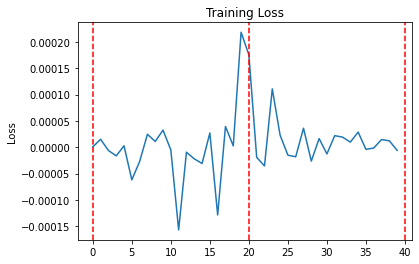

Tried 600 models, valid 600, time_spent_in_hours: 14h, time_spent_in_secs: 51978.016s, elapse since last report: 18.067s.
Tried 700 models, valid 700, time_spent_in_hours: 16h, time_spent_in_secs: 60392.102s, elapse since last report: 17.348s.


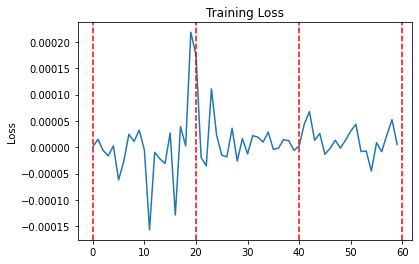

Tried 800 models, valid 800, time_spent_in_hours: 19h, time_spent_in_secs: 69406.363s, elapse since last report: 19.137s.
Tried 900 models, valid 900, time_spent_in_hours: 22h, time_spent_in_secs: 79835.483s, elapse since last report: 19.049s.
Tried 1000 models, valid 1000, time_spent_in_hours: 25h, time_spent_in_secs: 90151.14s, elapse since last report: 19.589s.


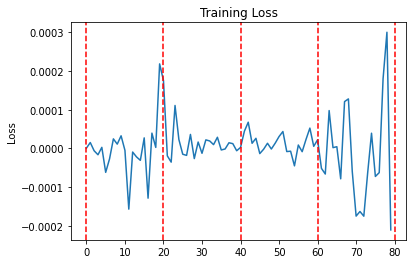

Tried 1100 models, valid 1100, time_spent_in_hours: 27h, time_spent_in_secs: 100181.093s, elapse since last report: 21.356s.
Tried 1200 models, valid 1200, time_spent_in_hours: 30h, time_spent_in_secs: 109901.832s, elapse since last report: 20.957s.


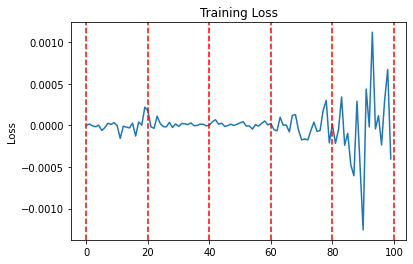

Tried 1300 models, valid 1300, time_spent_in_hours: 33h, time_spent_in_secs: 119823.239s, elapse since last report: 22.922s.
Tried 1400 models, valid 1400, time_spent_in_hours: 36h, time_spent_in_secs: 130263.208s, elapse since last report: 22.307s.
Tried 1500 models, valid 1500, time_spent_in_hours: 39h, time_spent_in_secs: 140677.448s, elapse since last report: 23.326s.


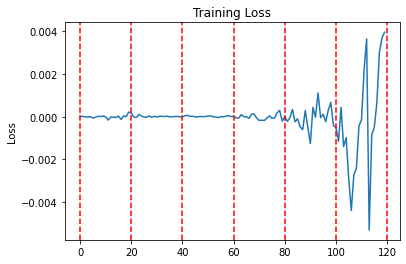

Tried 1600 models, valid 1600, time_spent_in_hours: 42h, time_spent_in_secs: 151396.03s, elapse since last report: 25.348s.
Tried 1700 models, valid 1700, time_spent_in_hours: 45h, time_spent_in_secs: 162312.24s, elapse since last report: 24.475s.


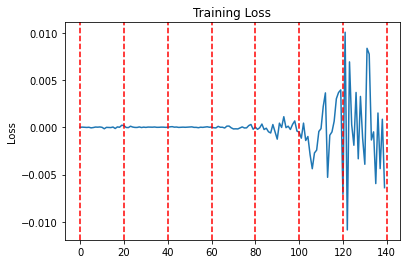

Tried 1800 models, valid 1800, time_spent_in_hours: 48h, time_spent_in_secs: 173273.294s, elapse since last report: 26.541s.
Total time elapse: 375.0925681591034 seconds.
--------------------------------------------------------------------------------
Total evaluated architectures: 1861
Total time spent:              18 hours
Best model found:              64:64:64:64:64
Best model DNA:                DNA([7, 7, 7, 7, 7])
Validation accuracy:           61.060000024414066
Test accuracy:                 70.71999989013672
--------------------------------------------------------------------------------
Search completed.
--------------------------------------------------------------------------------


,id,dna,cell_spec,val_acc,pred_acc,latency,time_cost,total_time,test_acc,test_loss,...,time_spent_in_hours,time_spent_in_secs,train_accuracy,train_loss,train_per_time,train_all_time,comment,algorithm,dataset,max_train_hours
771,772,"DNA([7, 7, 7, 7, 7])",64:64:64:64:64,61.06,-1,0.024246,130.705098,66692.499038,70.72,1.176126,...,18,66692.499,96.982,0.156491,10.849417,976.447506,,RL_DNAGenerator(),cifar100,50
774,775,"DNA([7, 7, 7, 7, 7])",64:64:64:64:64,61.06,-1,0.024246,130.705098,66998.276034,70.72,1.176126,...,18,66998.276,96.982,0.156491,10.849417,976.447506,,RL_DNAGenerator(),cifar100,50
790,791,"DNA([7, 7, 7, 7, 7])",64:64:64:64:64,61.06,-1,0.024246,130.705098,68529.354995,70.72,1.176126,...,19,68529.355,96.982,0.156491,10.849417,976.447506,,RL_DNAGenerator(),cifar100,50
816,817,"DNA([7, 7, 7, 7, 7])",64:64:64:64:64,61.06,-1,0.024246,130.705098,71213.499082,70.72,1.176126,...,19,71213.499,96.982,0.156491,10.849417,976.447506,,RL_DNAGenerator(),cifar100,50
822,823,"DNA([7, 7, 7, 7, 7])",64:64:64:64:64,61.06,-1,0.024246,130.705098,71862.963764,70.72,1.176126,...,19,71862.964,96.982,0.156491,10.849417,976.447506,,RL_DNAGenerator(),cifar100,50


In [7]:
ss_indicator = 'sss'
algo_name = 'rl'
dataset = 'cifar100'
max_train_hours = 50
use_neptune = False

executor = NASExecutor(algo_name, dataset, max_train_hours, ss_indicator, use_neptune)

dest_path = f'./results/exp_03/{ss_indicator}/{algo_name}_{str(max_train_hours)}h_{dataset}.csv'

sorted_results = executor.test_nas_algo(dest_path)
sorted_results.head()

#executor.save_report(sorted_results_rnd, f'data/{algo_name}_{max_train_hours}h_{dataset}.csv')

# Util Function

In [8]:
def plot_results(df):
    CONTROLLER_BATCH_SIZE = 64
    
    df = df.sort_values(by='id', ignore_index=True)
    df = df[['train_accuracy','val_acc','test_acc']].rolling(window=100, axis=0).mean()
    
    plt.figure(figsize=(20,6))
    
    plt.plot(df['train_accuracy'].values, color='blue')
    plt.plot(df['val_acc'].values, color='red')
    plt.plot(df['test_acc'].values, color='green')
    
    for i in range(0,len(df)+1,CONTROLLER_BATCH_SIZE):
        plt.axvline(x=i, color='orange', linestyle='--')
        plt.annotate(f't{int(i/CONTROLLER_BATCH_SIZE)}', (i+10, 5))
    
    plt.ylim([0,110])

    plt.legend(['Train accuracy', 'Validation accuracy', 'Test accuracy', 'Agent Training Step'])

    plt.show()
    
    
def plot_losses(df):
    CONTROLLER_TRAINING_EPOCHS = 20
    
    losses = df['loss']

    plt.figure(figsize=(20,6))

    plt.title('Training Loss')
    plt.ylabel('Loss')
    plt.plot(range(len(losses)), losses)

    for i in range(0, len(losses)+1, CONTROLLER_TRAINING_EPOCHS):
        plt.axvline(x=i, color='r', linestyle='--')
        plt.annotate(f't{int(i/CONTROLLER_TRAINING_EPOCHS)}', (i+1,-5e-4))

    plt.legend(['Loss', 'Training Batch'])    

    plt.show()

# 50h

### Cifar 10

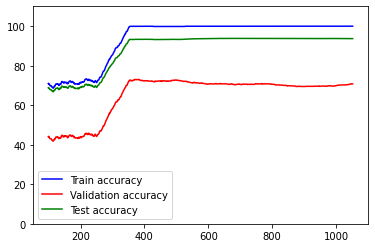

In [91]:
df = pd.read_csv('./data/pred_acc_test/tss/rl_50h_cifar10.csv')

plot_results(df)

### TSS - Cifar 100

#### controller_loss_alpha = 0.3

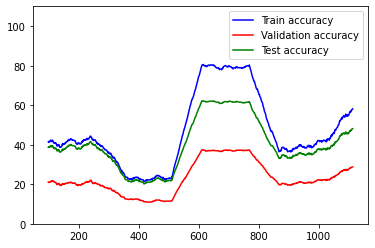

In [92]:
df = pd.read_csv('./data/pred_acc_test/tss/rl_50h_cifar100.csv')

plot_results(df)

#### controller_loss_alpha = 0.6

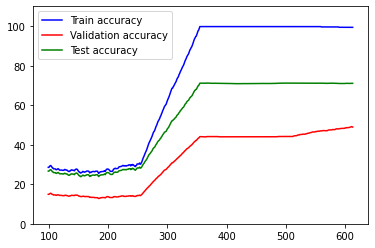

In [77]:
df = pd.read_csv('./data/pred_acc_test/tss/rl_50h_cifar100.csv')

plot_results(df)

#### controller_loss_alpha = 0.9

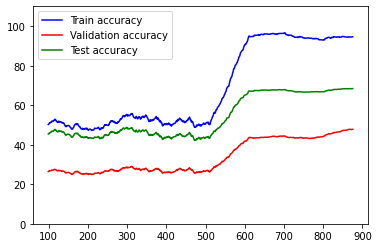

In [84]:
df = pd.read_csv('./data/pred_acc_test_1/tss/rl_50h_cifar100.csv')

plot_results(df)

## SSS - Cifar 100

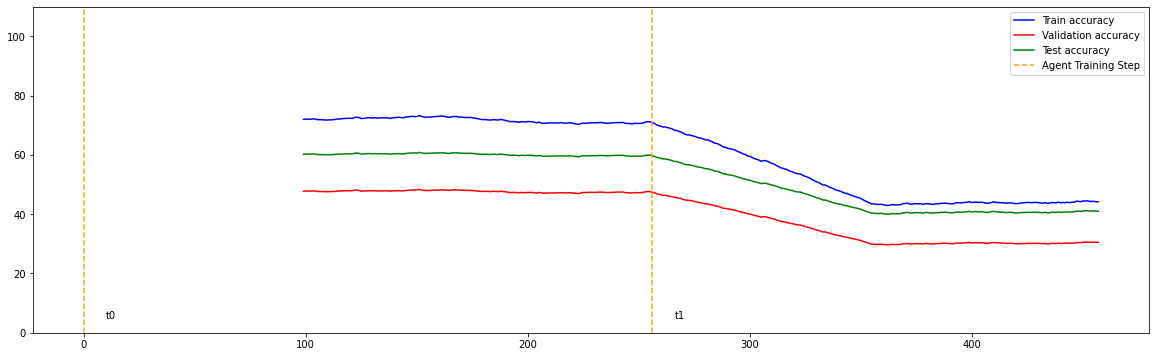

In [39]:
df = pd.read_csv('./data/pred_acc_test/sss/rl_10h_cifar100.csv')

plot_results(df)

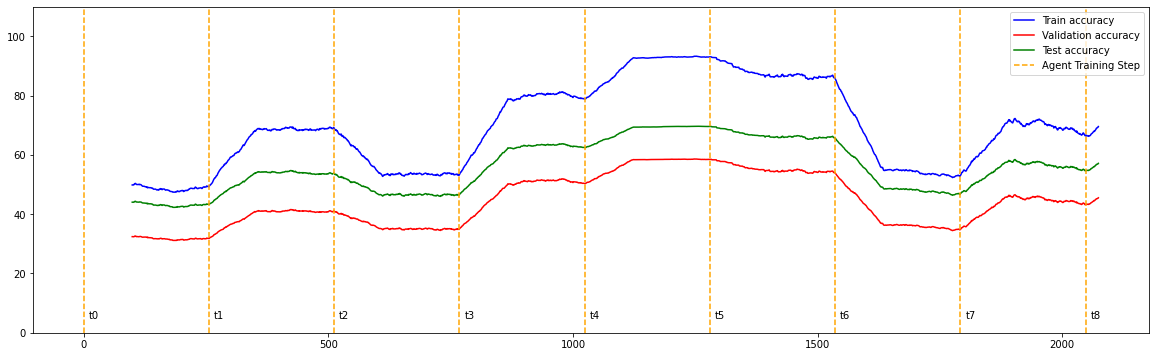

In [23]:
df = pd.read_csv('./data/pred_acc_test/sss/rl_50h_cifar100.csv')

plot_results(df)

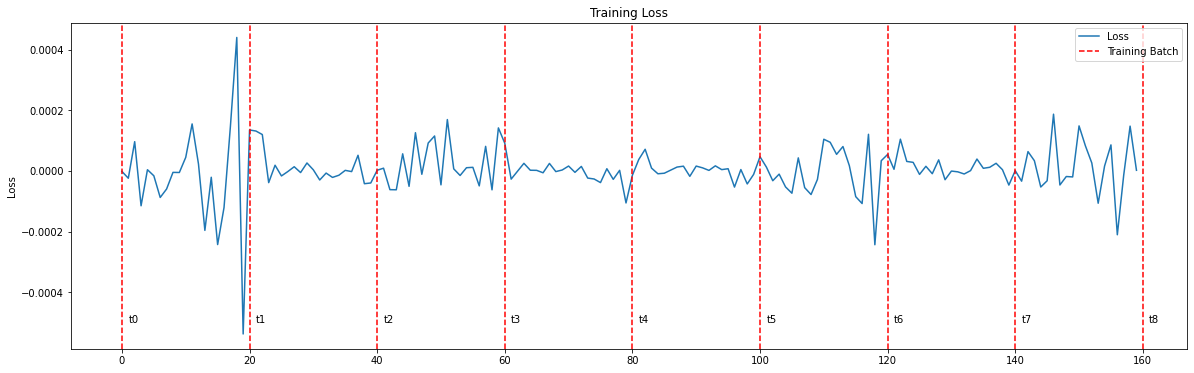

In [38]:
plot_losses(pd.read_csv('./LOGS/controller_losses.csv'))

# 100h

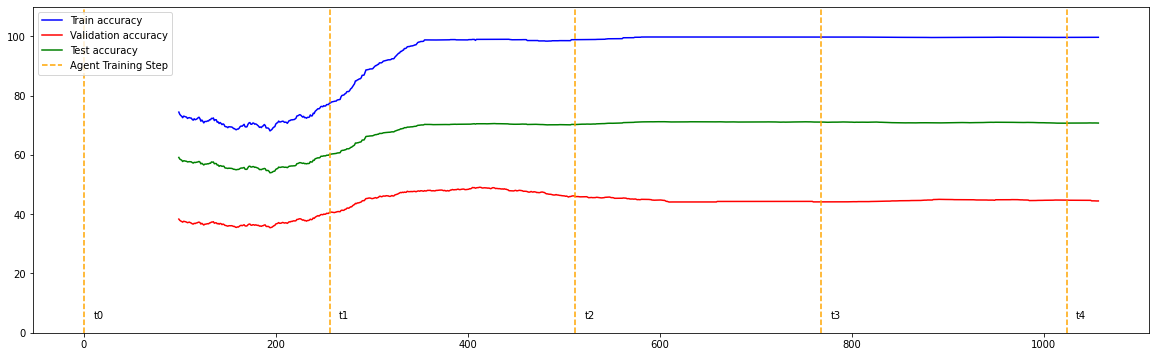

In [40]:
df = pd.read_csv('./data/pred_acc_test/tss/rl_100h_cifar100.csv')

plot_results(df)

# 200h

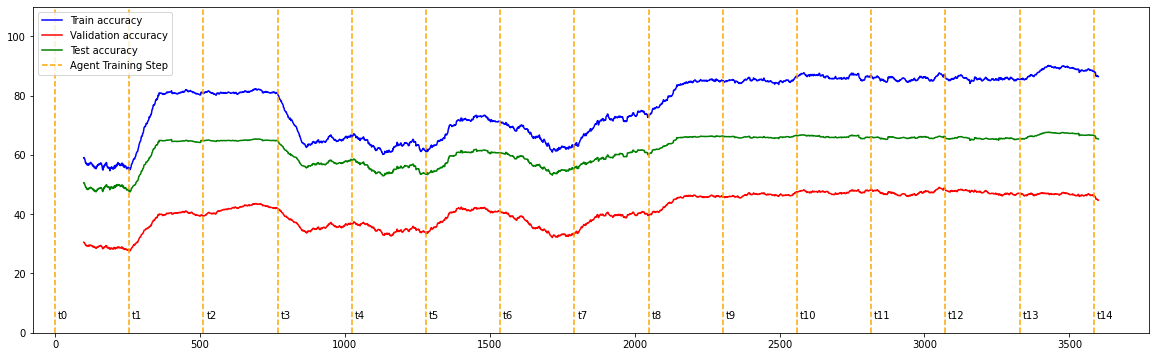

In [42]:
df = pd.read_csv('./data/pred_acc_test/tss/rl_200h_cifar100.csv')

plot_results(df)